In [1]:
import numpy as np
from numpy import pi, cos, sin, array, mean

In [2]:
from scipy.linalg import toeplitz

In [3]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [4]:
np.set_printoptions(4)

## Convolution

In [5]:
x = np.array([2,2,3, 4, 2,2, 4], np.int)
h = np.array([3,3,2], np.int)

In [6]:
np.convolve(x, h, 'full')

array([ 6, 12, 19, 25, 24, 20, 22, 16,  8])

In [7]:
toeplitz(x, np.zeros_like(h)) @ h

array([ 6, 12, 19, 25, 24, 20, 22])

In [8]:
h_long = np.zeros_like(x)
h_long[:len(h)] = h
toeplitz(h_long, np.zeros_like(x)) @ x

array([ 6, 12, 19, 25, 24, 20, 22])

## Correlation

In [9]:
x = array([1, 1j, -1, -1j])
y = x.copy()
np.correlate(x, y)

array([4.+0.j])

In [10]:
n = np.arange(60)
waveform = 2*cos(2*pi*0.1*n) + cos(2*pi*0.2*n) + 4*cos(2*pi*0.3*n)

In [11]:
signal = cos(2*pi*0.3*n)
np.correlate(waveform, signal)/len(signal)

array([2.])

### Sinusoid of arbitrary phase

In [12]:
waveform = 2*cos(2*pi*0.1*n + pi/4) + cos(2*pi*0.2*n) + 4*cos(2*pi*0.3*n)

In [13]:
signal_i = cos(2*pi*0.1*n)
signal_q = sin(2*pi*0.1*n)

A = 2*np.correlate(waveform, signal_i)/len(signal_i)
B = 2*np.correlate(waveform, signal_q)/len(signal_i)

M = A + B*1j
M = np.squeeze(M)

print(f'Amplitude = {np.abs(M):.1f}  Phase = {-np.angle(M, deg=True):.1f}')

Amplitude = 2.0  Phase = 45.0


### Specialized Codes

In [14]:
B = array([1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1])

In [15]:
SNR = 10 # dB
power_of_B = mean(B**2)

SNR_linear = 10**(SNR/10)
noise_power = power_of_B / SNR_linear
awgn = np.sqrt(noise_power) * np.random.randn(200)

rx_signal = awgn + np.pad(B, (50, 139), 'constant')

In [16]:
corr = np.correlate(rx_signal, B, 'full')

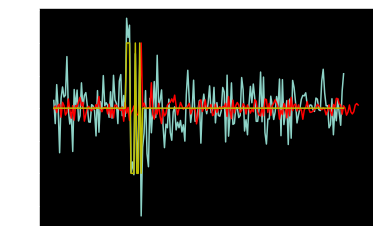

In [17]:
plt.plot(rx_signal);
plt.plot(corr/max(corr), 'r');
plt.plot(rx_signal - awgn, 'y')

In [18]:
C = B[::-1]
shift_register = np.zeros_like(C, np.float)
output = np.zeros_like(rx_signal)

for idx, sample in enumerate(rx_signal):
    shift_register = np.roll(shift_register, 1)
    shift_register[0] = sample
    output[idx] = np.dot(shift_register, C)
    

In [19]:
np.max(corr), np.max(output)

(11.10230299511348, 11.10230299511348)

### Walsh Codes

In [20]:
Walsh = array([[1, 1, 1, 1, 1, 1, 1, 1],
               [1, -1, 1, -1, 1, -1, 1, -1],
               [1, 1, -1, -1, 1, 1, -1, -1],
               [1, -1, -1, 1, 1, -1, -1, 1],
               [1, 1, 1, 1, -1, -1, -1, -1],
               [1, -1, 1, -1, -1, 1, -1, 1],
               [1, 1, -1, -1, -1, -1, 1, 1],
               [1, -1, -1, 1, -1, 1, 1, -1]])
Walsh

array([[ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1],
       [ 1,  1, -1, -1,  1,  1, -1, -1],
       [ 1, -1, -1,  1,  1, -1, -1,  1],
       [ 1,  1,  1,  1, -1, -1, -1, -1],
       [ 1, -1,  1, -1, -1,  1, -1,  1],
       [ 1,  1, -1, -1, -1, -1,  1,  1],
       [ 1, -1, -1,  1, -1,  1,  1, -1]])

In [21]:
u0_data = array([1, -1, 1])
u1_data = array([-1, -1, 1])
u2_data = array([-1, 1, -1])

In [22]:
user0_data = array([1, -1, 1])
user1_data = array([-1, -1, 1])
user2_data = array([-1, 1, -1])

In [23]:
u0_coded = (user0_data[:, np.newaxis] * Walsh[0]).flatten()
u1_coded = (user1_data[:, np.newaxis] * Walsh[1]).flatten()
u2_coded = (user2_data[:, np.newaxis] * Walsh[2]).flatten()

composite = u0_coded + u1_coded + u2_coded

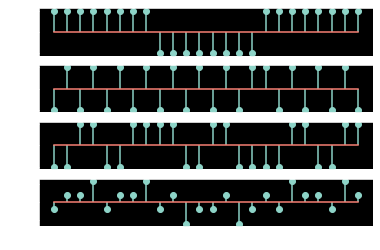

In [24]:
fig, ax = plt.subplots(4, 1); 
ax[0].stem(u0_coded, use_line_collection = True)
ax[1].stem(u1_coded, use_line_collection = True)
ax[2].stem(u2_coded, use_line_collection = True)
ax[3].stem(composite, use_line_collection = True);

In [25]:
u0_correlator = np.correlate(composite, Walsh[0], 'full')
u1_correlator = np.correlate(composite, Walsh[1], 'full')
u2_correlator = np.correlate(composite, Walsh[2], 'full')

In [26]:
u0_decoded = u0_correlator[7::8]/8
u1_decoded = u1_correlator[7::8]/8
u2_decoded = u2_correlator[7::8]/8

decoded_data = np.vstack([u0_decoded, u1_decoded, u2_decoded]).astype(np.int)
decoded_data

array([[ 1, -1,  1],
       [-1, -1,  1],
       [-1,  1, -1]])

#### Auto-correlation

In [27]:
B = array([1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1])
C = array([1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1])

<StemContainer object of 3 artists>

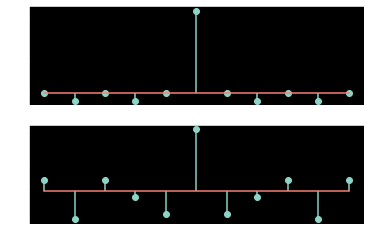

In [28]:
fig, ax = plt.subplots(2, 1)
ax[0].stem(np.correlate(B, B, 'same'), use_line_collection = True)
ax[1].stem(np.correlate(C, C, 'same'), use_line_collection = True)

In [29]:
np.correlate(C, C, 'same')

array([ 2, -5,  2, -1, -4, 11, -4, -1,  2, -5,  2])

In [30]:
np.correlate(B, B, 'same')

array([ 0, -1,  0, -1,  0, 11,  0, -1,  0, -1,  0])

## Fourier Transform